### **Load Dataset** ###

#### **Import Python Libraries and Modules** ####


In [2]:
# Import pandas and numpy Libraries

import pandas as pd
import numpy as np

# Import Libraries for Data visualization
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

# Import scikit-learn module for Linear regression
from sklearn.linear_model import LinearRegression

#Import scikit-learn module to train/test subset
from sklearn.model_selection import train_test_split

#Import scikit-Learn module for K-fold validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score




In [4]:
# Specify the full path of the csv file 
filename = 'C:/Users/jayanth/Desktop/MS UNT/INSD 5170 - BigData/Data/housing_boston.csv'

# specify the field names
names = ['CRIM', 'ZN', 'INDUS', 'CHAS','NOX','RM','AGE','DIS', 'RAD','TAX','PTRATIO','B','LSTAT','MEDV']

# Load the data in to the data frame
df = pd.read_csv(filename, names=names)


# creating a subset from the data frame
df2 = df[['RM', 'AGE', 'DIS','RAD','PTRATIO','MEDV']]


FileNotFoundError: [Errno 2] File b'C:/Users/jayanth/Desktop/MS UNT/INSD 5170 - BigData/Data/housing_boston.csv' does not exist: b'C:/Users/jayanth/Desktop/MS UNT/INSD 5170 - BigData/Data/housing_boston.csv'

### **Clean Data** ###
#### **Find and Mark the missing value** ####
#### *The following values cannot be 0. If there is 0, it is marked as missing value or NaN* ####
    

In [12]:
# Make 0 with missing value
df[['RM','PTRATIO','MEDV']] = df[['RM','PTRATIO','MEDV']].replace(0,np.NaN)

# count the no. of NaN in each column
print(df.isnull().sum())



NameError: name 'df' is not defined

### **Exploratoray Data Analysis**###
#### *Find the shape of the dataset* ####


In [ ]:
# Find the number of records in the file
print(df2.shape)

#### This file has 452 rows and 6 columns###

### ** Find the Attributes/Variable** ###


In [ ]:
# Find the data type of each variable
print(df2.dtypes)


### **Peek at the dataset** ###
#### ** Print the top 5 records** ####

In [ ]:
#Print the top 5 record
print(df2.head(5))


### ** Statistical Summary** ###


In [10]:
# Get the statistical summary
print(df2.describe())

               RM         AGE         DIS         RAD     PTRATIO        MEDV
count  452.000000  452.000000  452.000000  452.000000  452.000000  452.000000
mean     6.343538   65.557965    4.043570    7.823009   18.247124   23.750442
std      0.666808   28.127025    2.090492    7.543494    2.200064    8.808602
min      3.561000    2.900000    1.129600    1.000000   12.600000    6.300000
25%      5.926750   40.950000    2.354750    4.000000   16.800000   18.500000
50%      6.229000   71.800000    3.550400    5.000000   18.600000   21.950000
75%      6.635000   91.625000    5.401100    7.000000   20.200000   26.600000
max      8.780000  100.000000   12.126500   24.000000   22.000000   50.000000


#### This above result shows the mean, standard deviation and inter quatile range of the data
### **Univariate Data Visulaization** ###


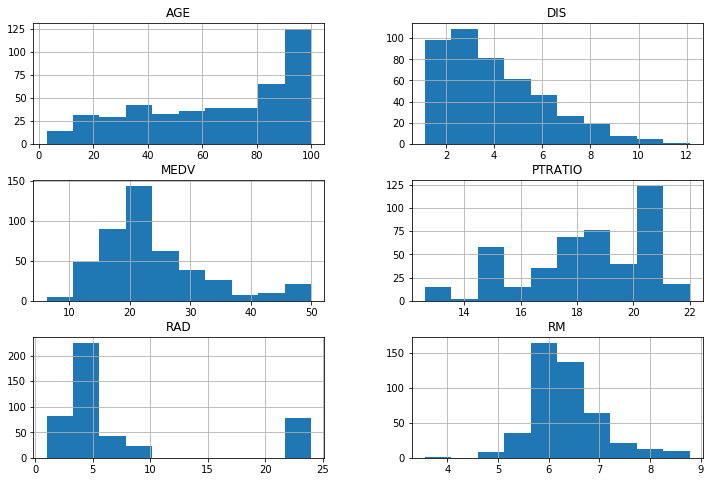

In [12]:
# Plot histogram for the subset of data
df2.hist(figsize=(12,8))
pyplot.show()


### **Density Plot ** ###

In [6]:
# Density Plot

df2.plot(kind = 'density', subplots = True, layout=(2,3), sharex = False, legend= True, fontsize = 2, figsize=(12,15))
 df2.plot()   
pyplot.show()



NameError: name 'df2' is not defined

### **Box Plot** ###

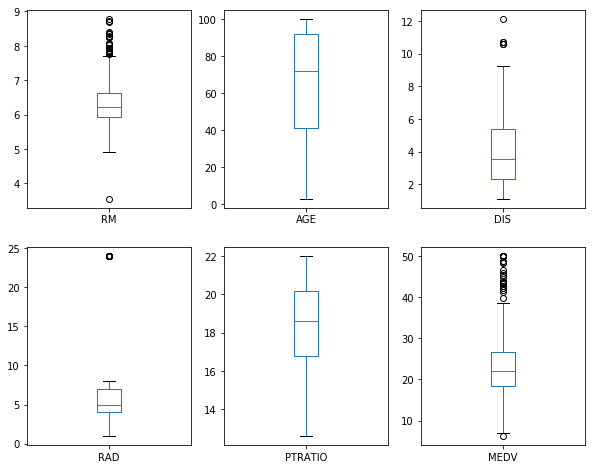

In [29]:
df2.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False, figsize=(10,8))
pyplot.show()


### **Multivariate Data Visualization** ###
#### **Scatter Matrix Plot** ####

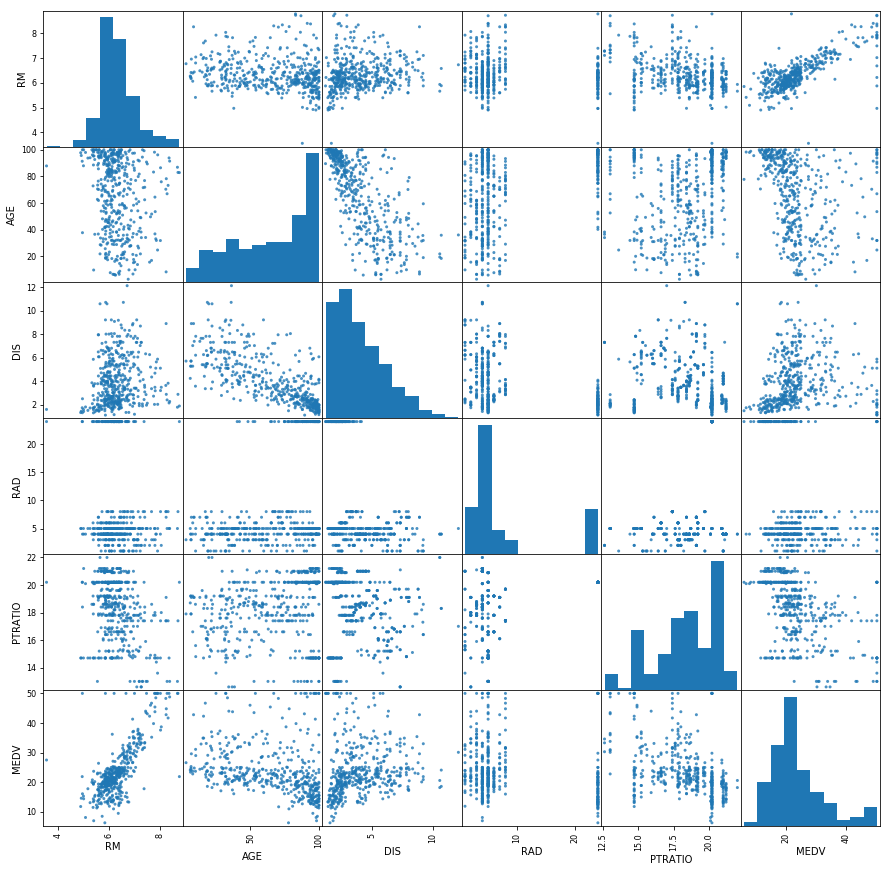

In [31]:
scatter_matrix(df2, alpha=0.8, figsize=(15,15))
pyplot.show()

### **Seperate the dataset into Input/Output** ###


In [52]:
# Store the dataframe into an array
array = df2.values

#Seperate the arrary into input and output
# All the rows and column 1 - 4
X = array[:,0:5]
# All the rows and the last column
Y = array[:,5]

### **Split Input/Output Arrays into Training/Testing Dataset** ###

In [53]:
# split the data in to training subset data- 67%  and testing testing subset- 33%

test_size=.33

#seed for randomization
seed =7

# Spliting input and output dataset into training and testing subsets
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=test_size, random_state=seed)


### **Build and Train the model** ###


In [54]:
#Build the model
#This is  Linear Regression model
model= LinearRegression()

#Train the model using Training dataset
model.fit(X_train,Y_train)

#Print the intercept and coefficient
print(model.intercept_)
print(model.coef_)

-4.5360217236096005
[ 8.45701265 -0.08160589 -0.80038663 -0.1426911  -0.86413873]


In [57]:
#Print the above result with their correspondent variable
name2 =['RM','AGE','DIS','RAD','PTRATIO']
coeffs_zip = zip(name2, model.coef_)

#Converting in to set 
coeffs=set(coeffs_zip)

#print coeffs
for coef in coeffs:
    print(coef, '\n')

('RAD', -0.1426910975737534) 

('RM', 8.457012650599344) 

('PTRATIO', -0.864138726101264) 

('AGE', -0.0816058938040116) 

('DIS', -0.8003866254122624) 



### **Calculating the R-Squared**###

In [41]:
R_squared = model.score(X_test, Y_test)

print(R_squared)


0.21185467899219823


### **Prediction**##

Predict the "Median value of owner-occupied homes in 1000 dollars"
<br>
**a. Record 1**
<br>
RM: average number of rooms per dwelling = 4
<br>
AGE: proportion of owner-occupied units built prior to 1940 = 45
<br>
DIS: weighted distances to five Boston employment centers = 5.7
<br>
RAD: index of accessibility to radial highways = 2.5
<br>
PTRATIO: pupil-teacher ratio by town = 15


In [56]:
model.predict([[4, 45, 5.7, 2.5, 15]])

array([7.73875126])

**Note**
<br>
The model predicts the median value of the home is 7,000 in the above suburb
<br>

**b. Record 2**
<br>
RM: average number of rooms per dwelling = 5
<br>
AGE: proportion of owner-occupied units built prior to 1940 = 30
<br>
DIS: weighted distances to five Boston employment centers = 7
<br>
RAD: index of accessibility to radial highways = 4
<br>
PTRATIO: pupil-teacher ratio by town = 12

In [59]:
model.predict([[5, 30, 7, 4, 12]])

array([18.75772923])

**Note**
<br>
The Model predicts the median value of home is 18,000 in the above suburb

###  **Evaluate the modle using K-Fold Cross validation** ###


In [64]:
# Spefify  the K-size
num_fold = 10

#Fix the random seed. It is same as we used in the subset
#For each time the process is repeated

seed=7

#spliting the data into Kfold
k_fold = KFold(n_splits=num_fold,random_state=seed)

# For Linear regression Model we Mean SQuare Value for Scoring
scoring = 'neg_mean_squared_error'

result=cross_val_score(model, X, Y, cv=k_fold, scoring=scoring)

print(result.mean())


-31.17777676938244


**Note**
<br>
The above result shows the mean of error estimation. This is should be a positive no. But Scikit reports this as negative number.